# Prática 1

**Disciplina:** GB-500 Aprendizado de Máquina <br/>
**Professores:** Artur Ziviani, Fábio Custódio, Fabio Porto, Luiz Gadelha, Yania M. Souto, Emerson Lima<br/>
**Autor**: Emerson C. Lima<br/>
**Data:** 27/06/2019<br/>

Este Notebook será utilizado na primeira prática da disciplina GB 500 - Aprendizado de Máquina, ministrada no programa de Pós-Graduação em Modelagem Computacional do Laboratório Nacional de Computação Científica, no Inverno de 2019, tendo como objetivo expor e exercitar os conceitos já discutidos até o momento na disciplina.



In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.size'] = 14
np.random.seed(0)

## Conjunto de dados

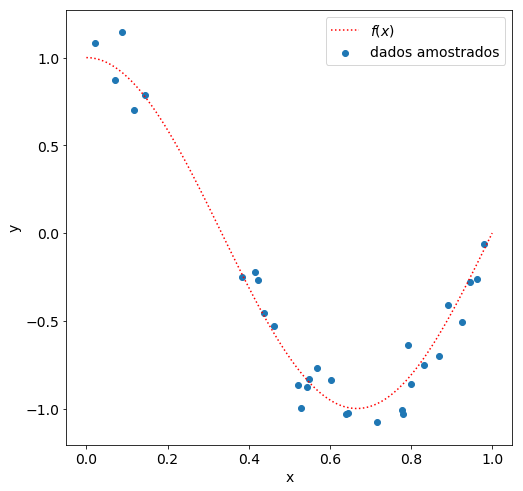

In [31]:
n_amostras = 30

def f_real(x):    
    return np.cos(1.5 * np.pi * x)

x = np.sort(np.random.rand(n_amostras))
y = f_real(x) + np.random.randn(n_amostras) * 0.1

plt.figure(figsize=(8, 8))
plt.plot(np.linspace(0, 1, 100), f_real(np.linspace(0, 1, 100)), c="red", ls=":", label="$f(x)$")
plt.scatter(x, y, label="dados amostrados")
plt.xlabel("x")
plt.ylabel("y")
plt.legend();

## Modelo linear

In [32]:
def modelo_linear(a, b):
    def h(x):
        return a*x + b
    return h

h = modelo_linear(3, 2)
print("h", h)
h(0.5)

h <function modelo_linear.<locals>.h at 0x7f694afbd048>


3.5

h <function modelo_linear.<locals>.h at 0x7f694afbd1e0>


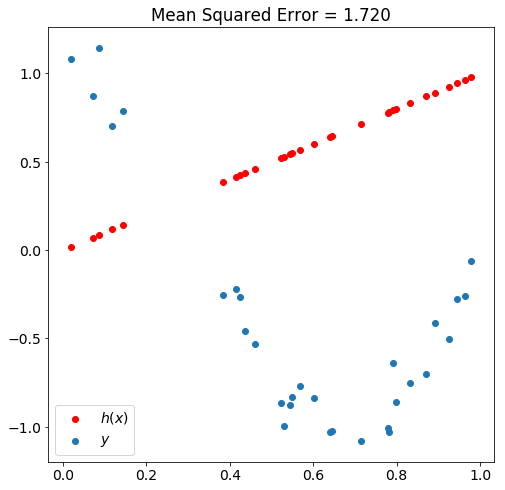

In [33]:
h = modelo_linear(1, 0)
print("h", h)
y_hat = h(x)

mean_squared_error = np.mean((y_hat - y)**2)

plt.figure(figsize=(8, 8))
plt.scatter(x, y_hat, c="red", label="$h(x)$")
plt.scatter(x, y, label="$y$");
plt.legend()
plt.title("Mean Squared Error = {:.3f}".format(mean_squared_error));

## Modelo Quadrádico

Um modelo quadrádico $h(x) = ax^2 + bx + c$ re-escrito em função de seu vértice $v = (v_x, v_y)$ é dado por 

$ h(x) = a(x - v_x)^2 + v_y $, onde $a$ = curvatura das "pernas"

In [34]:
def modelo_quadradico(vertice_x, vertice_y, curvatura):
    def h(x):
        return curvatura*(x - vertice_x)**2 + vertice_y
    return h

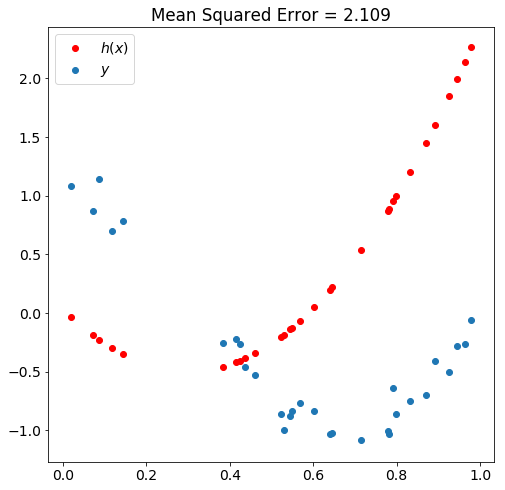

In [38]:
h = modelo_quadradico(0.3, -0.5, 6)
y_hat = h(x)

mean_squared_error = np.mean((y_hat - y)**2)

plt.figure(figsize=(8, 8))
plt.scatter(x, y_hat, c="red", label="$h(x)$")
plt.scatter(x, y, label="$y$");
plt.legend()
plt.title("Mean Squared Error = {:.3f}".format(mean_squared_error));

## Modelo Logístico

$ h(x) = \frac{L}{1 + e^{-k(x-x_0)}} + l $, onde $L$ = ponto máximo, $k$ = taxa de crescimento e $x_0$ = ponto central e $l$ = ponto mínimo

In [39]:
def modelo_logistico(ponto_central, maximo, minimo, crescimento):
    def h(x):
        return maximo / (1 + np.exp(-crescimento * (x - ponto_central))) + minimo
    return h

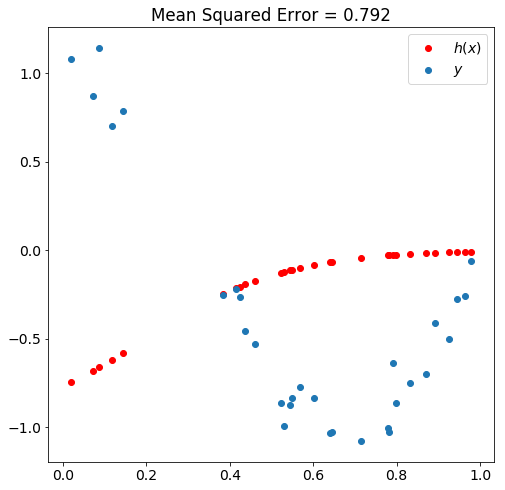

In [40]:
h = modelo_logistico(0.2, 1, -1, 6)
y_hat = h(x)

mean_squared_error = np.mean((y_hat - y)**2)

plt.figure(figsize=(8, 8))
plt.scatter(x, y_hat, c="red", label="$h(x)$")
plt.scatter(x, y, label="$y$");
plt.legend()
plt.title("Mean Squared Error = {:.3f}".format(mean_squared_error));

## Modelo Memória

In [41]:
def modelo_memoria(x, y):
    dicionario = {x_i: y_i for x_i, y_i in zip(x, y)}
    def h(x):
        return [dicionario[x_i] for x_i in x]
    return h

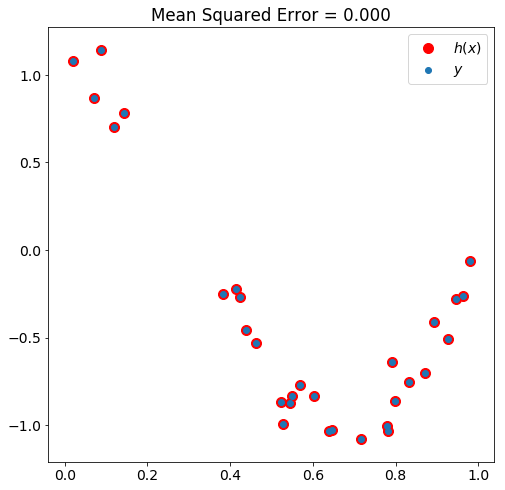

In [42]:
h = modelo_memoria(x, y)
y_hat = h(x)

mean_squared_error = np.mean((y_hat - y)**2)

plt.figure(figsize=(8, 8))
plt.scatter(x, y_hat, s=100, c="red", label="$h(x)$")
plt.scatter(x, y, label="$y$");
plt.legend()
plt.title("Mean Squared Error = {:.3f}".format(mean_squared_error));

## Avaliando o risco empírico

### Conjunto de teste

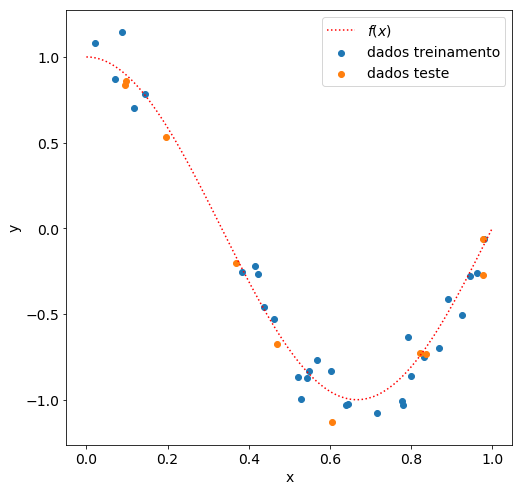

In [43]:
n_amostras_teste = 10

def f_real(x):    
    return np.cos(1.5 * np.pi * x)

x_teste = np.sort(np.random.rand(n_amostras_teste))
y_teste = f_real(x_teste) + np.random.randn(n_amostras_teste) * 0.1

plt.figure(figsize=(8, 8))
plt.plot(np.linspace(0, 1, 100), f_real(np.linspace(0, 1, 100)), c="red", ls=":", label="$f(x)$")
plt.scatter(x, y, label="dados treinamento")
plt.scatter(x_teste, y_teste, label="dados teste")
plt.xlabel("x")
plt.ylabel("y")
plt.legend();

### Avaliando o *mean squared error* de $h(x)$ com os dados de teste

In [44]:
def avalia(h, nome):
    mse_treinamento = np.mean((h(x) - y)**2)
    mse_teste = np.mean((h(x_teste) - y_teste)**2)
    print("modelo: {:10s}\tmse (treinamento): {:.3f}\tmse (teste): {:.3f}".format(nome, mse_treinamento, mse_teste))

avalia(modelo_linear(1, 0), "linear")
avalia(modelo_quadradico(0.6, -1.0, 5), "quadrádico")
avalia(modelo_logistico(0.5, 1, -1, -10), "logistico")
#avalia(modelo_memoria(x, y), "memória")

modelo: linear    	mse (treinamento): 1.720	mse (teste): 1.340
modelo: quadrádico	mse (treinamento): 0.118	mse (teste): 0.160
modelo: logistico 	mse (treinamento): 0.259	mse (teste): 0.354


## Ajuste dos modelos (Busca por parâmetros)

### Hiperespaço dos parâmetros do modelo logístico

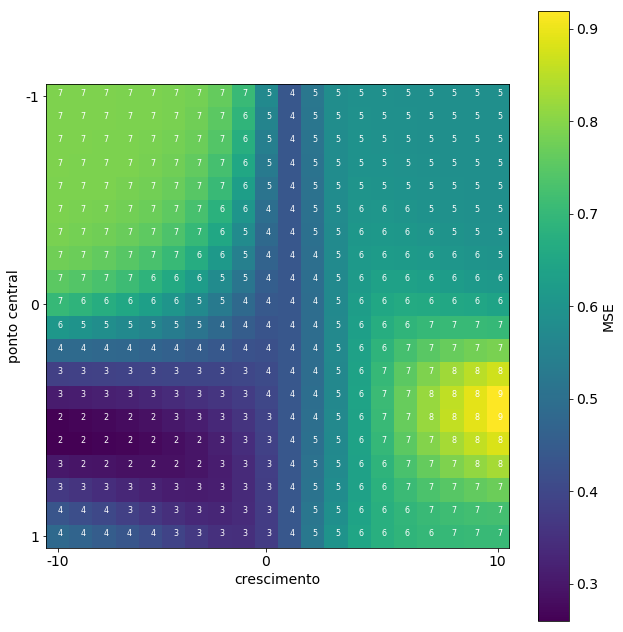

In [45]:
ponto_central = np.arange(-1, 1, 0.1)
crescimento = np.arange(-10, 10, 1)

dim = len(ponto_central)

erro = np.zeros([dim, dim])

for i in range(dim):
  p = ponto_central[i]
  for j in range(dim):
    c = crescimento[j]
    h = modelo_logistico(p, 1, -1, c)
    e = np.mean((h(x) - y)**2)
    erro[i, j] = e
#    if e < 9:      
#      print(p, c, e)
    
#erro[0, 0] = float("inf")

plt.figure(figsize=(9,9))
plt.imshow(erro, interpolation="none")

for i in range(dim):
    for j in range(dim):
        primeira_casa_decimal = str(int(erro[i, j]*10))
        plt.text(j, i, primeira_casa_decimal, color="white", fontsize=8)
    
plt.xlabel("crescimento")
plt.ylabel("ponto central")
plt.xticks([0, 9, 19], [-10, 0, 10]);
plt.yticks([0, 9, 19], [-1, 0, 1])
plt.colorbar(label="MSE")
plt.tight_layout()

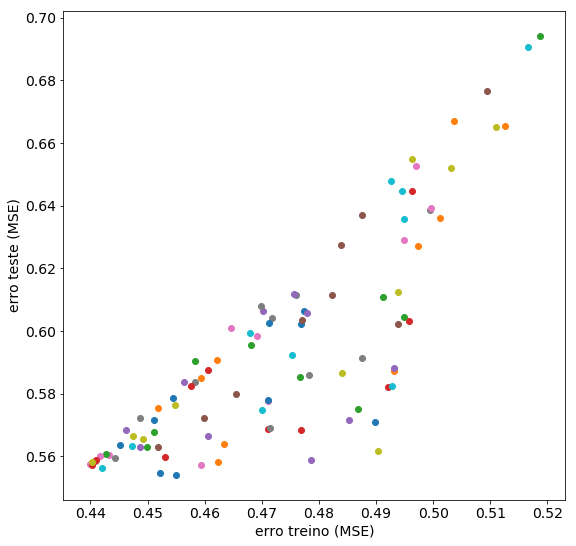

In [46]:
def avalia(h):
    mse_treinamento = np.mean((h(x) - y)**2)
    mse_teste = np.mean((h(x_teste) - y_teste)**2)
    return mse_treinamento, mse_teste

plt.figure(figsize=(9, 9))
# realiza uma busca aleatória nos parâmetros dos modelos
for i in range(100):
    ponto_central = np.random.rand()
    maximo = 1, 
    minimo = -1
    crescimento = np.random.rand()
    h = modelo_logistico(ponto_central, maximo, minimo, crescimento)
    
    erro_treino, erro_teste = avalia(h)
    plt.scatter(erro_treino, erro_teste)

plt.xlabel("erro treino (MSE)")
plt.ylabel("erro teste (MSE)");

In [23]:
def avalia(h):
    mse_treinamento = np.mean((h(x) - y)**2)
    mse_teste = np.mean((h(x_teste) - y_teste)**2)
    return mse_treinamento, mse_teste

# realiza uma busca aleatória nos parâmetros dos modelos
menor_erro = float("inf")
menor_ponto_central = None
menor_maximo = None
menor_minimo = None
menor_crescimento = None
for i in range(100):    
    ponto_central = np.random.rand()
    maximo = 1, 
    minimo = -1
    crescimento = np.random.rand()
    h = modelo_logistico(ponto_central, maximo, minimo, crescimento)
    
    erro_treino, _ = avalia(h)    
   
    if erro_treino < menor_erro:
        menor_ponto_central = ponto_central
        menor_maximo = maximo
        menor_minimo = minimo
        menor_crescimento = crescimento    
        menor_erro = erro_treino
        
print("{:10s}\t{:30s}\t{:10s}".format("modelo", "parametros", "erro treino"))
print(90*"-")
print("{:10s}\t{:30s}\t{:3f}".format(
    "logistico", 
    "{:3f}, {:3f}".format(menor_ponto_central, menor_crescimento),
    menor_erro,    
))

modelo    	parametros                    	erro treino
------------------------------------------------------------------------------------------
logistico 	0.131055, 0.012036            	0.439977


<div class="alert alert-block alert-success">
<b>Exercício 1:</b>
Encontre os parâmetros ótimos (menor MSE) para os modelos linear, quadrádico, logístico e de memória vistos anteriormente. Use o código abaixo como ponto de partida.
</div>

## Capacidade, Sobajuste e Sobreajuste

In [48]:
def modelo_polinomial_fitted(grau, x, y):
    poly = np.polynomial.polynomial.Polynomial(np.arange(grau))
    s = poly.fit(x, y, grau)
    #print("coeficientes menor mse para grau", grau, ":", s.convert().coef)
    poly_fitted = np.polynomial.polynomial.Polynomial(s.convert().coef)
    def h(x):
        return poly_fitted(x)
    return h

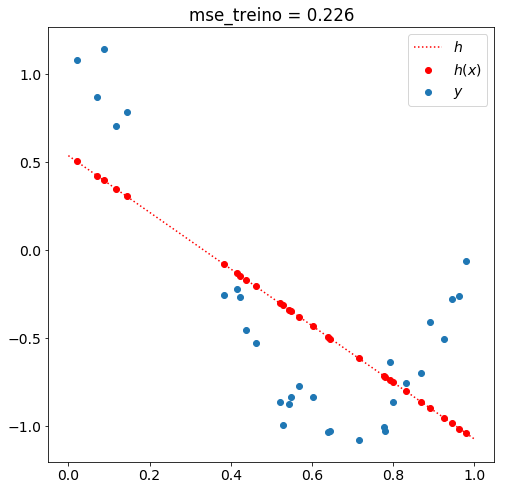

In [52]:
h = modelo_polinomial_fitted(1, x, y)

y_hat = h(x)
mse_treino = np.mean((y_hat - y)**2)

plt.figure(figsize=(8, 8))
plt.scatter(x, y_hat, c="red", label="$h(x)$")
plt.scatter(x, y, label="$y$")
plt.plot(np.linspace(0, 1, 100), h(np.linspace(0, 1, 100)), c="red", ls=":", label="$h$")
plt.legend()
plt.title("mse_treino = {:.3f}".format(mse_treino));

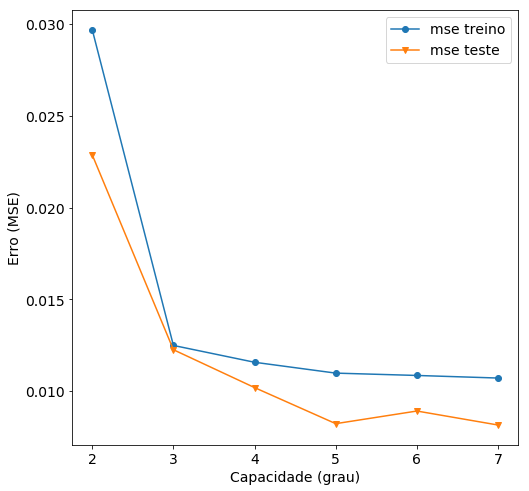

In [61]:
graus = list(range(2, 8))
mse_treinos = []
mse_testes = []

for g in graus:
    h = modelo_polinomial_fitted(g, x, y)

    mse_treinos.append(np.mean((h(x) - y)**2))
    mse_testes.append(np.mean((h(x_teste) - y_teste)**2))

plt.figure(figsize=(8, 8))    
plt.plot(graus, mse_treinos, "-o", label="mse treino")
plt.plot(graus, mse_testes, "-v", label="mse teste")
plt.xlabel("Capacidade (grau)")
plt.ylabel("Erro (MSE)")
plt.legend();